# Dynamically update graph

In [1]:
cd ~/thesis

/home/jovyan/thesis


/home/jovyan/venvs/my_environment/lib/python3.10/site-packages/IPython/core/magics/osm.py:393: UserWarning: using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})
/home/jovyan/venvs/my_environment/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


Import libraries

In [2]:
import numpy as np
import pandas as pd
import networkx as nx

# Modify eliorc's implementation
from eliorc_mod.node2vec import Node2Vec
from gensim.models import Word2Vec

from main_utils import *
from plot_utils import *

/tmp/ipykernel_319/702283646.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### BlogCatalog 

In [3]:
blog_dir = '/home/jovyan/thesis/datasets/blog_catalog/data/'

G = nx.read_edgelist(blog_dir+'edges.csv', delimiter=',')
G.name = 'blog_catalog'

# Groups mapping
group_df = pd.read_csv(blog_dir+'group-edges.csv', delimiter=',')
group_df.columns = ['node_num', 'group']

model = Word2Vec.load("models/blog_model")

groups_dict = {node_num: group_df.loc[node_num, 'group']  for node_num in group_df['node_num']}

X, y, _ = emb_group_gen(groups_dict, model)

# # Plot
# test_grid_search(G, X, y)

In [4]:
G.nodes()

NodeView(('1', '176', '233', '283', '371', '394', '446', '585', '645', '667', '696', '753', '792', '867', '911', '996', '1136', '1175', '1263', '1443', '1644', '1787', '1811', '1876', '1971', '2369', '2461', '2521', '2624', '2771', '2861', '2999', '3122', '3198', '3204', '3258', '3262', '3339', '3407', '3489', '3561', '3599', '3608', '3820', '3940', '4062', '4374', '4390', '4491', '4613', '4652', '4723', '4836', '4839', '4843', '4928', '4984', '4997', '5092', '5152', '5204', '5241', '5259', '5311', '5334', '5346', '5377', '5450', '5488', '5685', '5705', '5851', '5906', '5912', '5999', '6030', '6066', '6074', '6141', '6179', '6187', '6539', '6551', '6552', '6639', '6643', '6753', '6832', '6860', '6895', '6907', '6950', '6959', '7019', '7098', '7149', '7228', '7370', '7373', '7495', '7545', '7748', '7806', '7922', '7966', '7989', '8056', '8099', '8234', '8387', '8524', '8525', '8859', '8969', '8976', '9824', '9919', '9961', '9997', '10143', '2', '2241', '2803', '4845', '6873', '8868', '8

## Other graphs

### Extending the graph

In [3]:
# initial_graph = nx.random_tree(256)

initial_graph = nx.erdos_renyi_graph(1024, 0.3)
# plot_graph(initial_graph)

In [4]:
l = [1, 2, 3]
l[::-1]

[3, 2, 1]

In [5]:
graphs_list = dynamic_graph_gen(initial_graph, 16)

# for graph in graphs_list:
#     # print(graph.number_of_nodes(), graph.number_of_edges())
#     if not nx.is_connected(graph):
#         plot_graph(graph)

In [6]:
starting_graph = graphs_list[0]
updated_graph = graphs_list[5]

In [7]:
starting_nodes = set(starting_graph.nodes())
updated_nodes = set(updated_graph.nodes())

diff_nodes = updated_nodes - starting_nodes

In [8]:
diff_graph = nx.subgraph(updated_graph, diff_nodes)

In [9]:
print(quick_info(starting_graph))
print(quick_info(updated_graph))
print(quick_info(diff_graph))

(1008, 152517)
(1013, 154076)
(5, 2)


In [65]:
print(quick_info(starting_graph))
print(quick_info(updated_graph))
print(quick_info(diff_graph))

(977, 138246)
(1024, 145872)
(47, 226)


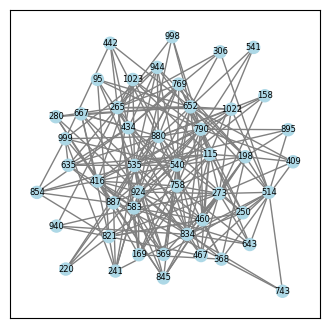

In [66]:
plot_graph(diff_graph)

In [14]:
neighborhood = get_neighborhood(updated_graph, 36, max_step=1)
print(len(neighborhood))

303


In [15]:
# View connection with model_gen to modify it possibly

params=[64, 8, 8, 0.25, 4]

[d, r, l, p, q] = params

In [16]:
node2vec_start = Node2Vec(starting_graph, dimensions=d, walk_length=l, num_walks=r, p=p, q=q, workers=8, temp_folder='temp_folder', quiet=True)  # Use temp_folder for big graphs

model_start = node2vec_start.fit(window=10, min_count=1, batch_words=4) #, ns_exponent=1)

In [17]:
node2vec_upd = Node2Vec(updated_graph, dimensions=d, walk_length=l, num_walks=r, p=p, q=q, workers=8, temp_folder='temp_folder', 
                    starting_nodes=diff_nodes, quiet=True)  # Use temp_folder for big graphs

model_upd = node2vec_upd.fit(window=10, min_count=1, batch_words=4) #, ns_exponent=1)

In [18]:
# _, model_initial = model_gen(initial_graph, params)
# _, model_dyn = model_gen(graph_0, params)

In [19]:
groups_dict = groups_assign(initial_graph, initial_graph)
len(groups_dict)

1024

In [20]:
X_start, y_start, node_vectors_dict_start = emb_group_gen(groups_dict, model_start)
X_upd, y_upd, node_vectors_dict_upd = emb_group_gen(groups_dict, model_upd)

In [21]:
# Convert each list into a set and find the union
traversed_nodes = set.union(*map(set, node2vec_upd.walks))

traversed_nodes = list(map(int, traversed_nodes))

print(len(traversed_nodes))

790


In [22]:
len(node_vectors_dict_upd)

790

In [23]:
node_vectors_dict_manual = node_vectors_dict_start.copy()

temp_dict = {key: node_vectors_dict_upd[key] for key in traversed_nodes}

node_vectors_dict_manual.update(temp_dict)

In [24]:
len(node_vectors_dict_manual)

1023

In [25]:
X_manual = list(node_vectors_dict_manual.values())
y_manual = [groups_dict[key] for key in node_vectors_dict_manual if key in groups_dict]

print(len(X_manual), len(y_manual))

1023 1023


In [38]:
test_sizes=np.arange(0.1, 1, 0.05)
quick_scores_func(X_upd, y_upd, X_manual, y_manual, test_sizes)

Scratch 0.19152215700389855 - Modified 0.1968005601621545


In [35]:
test_sizes=np.arange(0.1, 1, 0.1)

print("\n**From scratch**")

for test_size in test_sizes:
    print(f"- For training size: {(1 - test_size):.1f}: {list(ovr_classifier(X_upd, y_upd, test_size).values())}")


print("\n**Manually**")

for test_size in test_sizes:
    print(f"- For training size: {(1 - test_size):.1f}: {list(ovr_classifier(X_manual, y_manual, test_size).values())}")


**From scratch**
- For training size: 0.9: [[0.16455696202531644, 0.056521739130434775]]
- For training size: 0.8: [[0.17721518987341772, 0.060215053763440864]]
- For training size: 0.7: [[0.19747899159663865, 0.06596491228070175]]
- For training size: 0.6: [[0.20569620253164558, 0.06824146981627296]]
- For training size: 0.5: [[0.20253164556962025, 0.06736842105263158]]
- For training size: 0.4: [[0.19831223628691982, 0.06619718309859154]]
- For training size: 0.3: [[0.19349005424954793, 0.06484848484848485]]
- For training size: 0.2: [[0.20727848101265822, 0.06867627785058977]]
- For training size: 0.1: [[0.20815752461322082, 0.0689173457508731]]

**Manually**
- For training size: 0.9: [[0.1553398058252427, 0.05378151260504201]]
- For training size: 0.8: [[0.17560975609756097, 0.059751037344398336]]
- For training size: 0.7: [[0.18566775244299674, 0.07392857142857143]]
- For training size: 0.6: [[0.1926829268292683, 0.06462167689161555]]
- For training size: 0.5: [[0.201171875, 0.06

#### Complete

In [3]:
initial_graph = nx.erdos_renyi_graph(1024, 0.3)
added_nodes_num = 128

params = [64, 8, 8, 0.25, 4]

[d, r, l, p, q] = params

X_global, y_global, X_manual, y_manual, total_global_time, total_local_time = \
    dynamic_extend_compare(initial_graph, added_nodes_num, params)

KeyboardInterrupt: 

In [11]:
total_global_time, total_local_time

(7.0265350341796875, 6.623918056488037)

In [19]:
# With the temp model
total_global_time, total_local_time

(322.41303968429565, 631.5512735843658)

In [22]:
# Omitting the temp model
total_global_time, total_local_time

(316.18458247184753, 310.72692942619324)

In [24]:
# For big extending subgraph
total_global_time, total_local_time

(319.0935130119324, 214.0319402217865)

In [10]:
initial_graph = nx.erdos_renyi_graph(256, 0.3)
added_nodes_num = 64

params = [64, 8, 8, 0.25, 4]

[d, r, l, p, q] = params

X_global, y_global, X_manual, y_manual, total_global_time, total_local_time = \
    dynamic_extend_compare(initial_graph, added_nodes_num, params)

(192, 5587) (256, 9854)

**From scratch**
- For training size: 0.9: [[0.19230769230769232, 0.06451612903225806]]
- For training size: 0.8: [[0.21153846153846154, 0.06984126984126984]]
- For training size: 0.7: [[0.19480519480519481, 0.06521739130434782]]
- For training size: 0.6: [[0.22330097087378642, 0.073015873015873]]
- For training size: 0.5: [[0.1640625, 0.056375838926174496]]
- For training size: 0.4: [[0.17532467532467533, 0.059668508287292824]]
- For training size: 0.3: [[0.16666666666666666, 0.05714285714285714]]
- For training size: 0.2: [[0.15121951219512195, 0.08764568764568764]]
- For training size: 0.1: [[0.1774891774891775, 0.06029411764705882]]

**Manually**
- For training size: 0.9: [[0.19230769230769232, 0.06451612903225806]]
- For training size: 0.8: [[0.21153846153846154, 0.06984126984126984]]
- For training size: 0.7: [[0.11688311688311688, 0.08969696969696969]]
- For training size: 0.6: [[0.11650485436893204, 0.041739130434782605]]
- For training size: 0.5: [[0.1

In [11]:
total_global_time, total_local_time

(5.346615314483643, 5.072466135025024)

### Pruning the graph

In [19]:
params=[64, 8, 8, 0.25, 4]

[d, r, l, p, q] = params

initial_graph = nx.erdos_renyi_graph(128, 0.3)

graphs_list = dynamic_graph_gen(initial_graph, 48)

In [20]:
graph_pruned = graphs_list[0]
graph_upd = graphs_list[5]

nodes_pruned = set(graph_pruned.nodes())
nodes_upd = set(graph_upd.nodes())

diff_nodes = nodes_upd - nodes_pruned

In [21]:
print(quick_info(graph_pruned))
print(quick_info(graph_upd))

(93, 916)
(124, 1094)


In [11]:
list(diff_nodes)[:3]

[641, 644, 914]

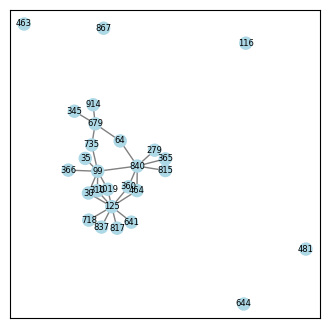

In [12]:
plot_graph(nx.subgraph(graph_upd, diff_nodes))

In [22]:
neighbors = removed_nodes_neighbors_func(graph_upd, diff_nodes, max_step=1)

In [23]:
len(set(neighbors))

87

In [24]:
len(neighbors)

164

In [25]:
groups_dict = groups_assign(initial_graph, initial_graph)

In [26]:
# Pruned models
node2vec_pruned = Node2Vec(graph_pruned, dimensions=d, walk_length=l, num_walks=r, p=p, q=q, workers=8, temp_folder='temp_folder',
                      starting_nodes=neighbors, quiet=True)  # Use temp_folder for big graphs

model_pruned = node2vec_pruned.fit(window=10, min_count=1, batch_words=4) #, ns_exponent=1)

X_pruned, y_pruned, node_vectors_dict_pruned = emb_group_gen(groups_dict, model_pruned)

In [27]:
node2vec_upd = Node2Vec(graph_upd, dimensions=d, walk_length=l, num_walks=r, p=p, q=q, workers=8, temp_folder='temp_folder', quiet=True)  # Use temp_folder for big graphs

model_upd = node2vec_upd.fit(window=10, min_count=1, batch_words=4) #, ns_exponent=1)

X_upd, y_upd, node_vectors_dict_upd = emb_group_gen(groups_dict, model_upd)

In [28]:
# Initial model and embeddings
node2vec_initial = Node2Vec(initial_graph, dimensions=d, walk_length=l, num_walks=r, p=p, q=q, workers=8, temp_folder='temp_folder', quiet=True)  # Use temp_folder for big graphs

model_initial = node2vec_initial.fit(window=10, min_count=1, batch_words=4) #, ns_exponent=1)

X_initial, y_initial, node_vectors_dict_initial = emb_group_gen(groups_dict, model_initial)

Update the embeddings of node_vectors_dict_initial with those of node2vec_i, check pruned compared function from main_utils on how to do it.

In [29]:
# ??
node_vectors_dict_mod = {key: node_vectors_dict_initial[key] for key in node_vectors_dict_initial if key not in diff_nodes}
node_vectors_dict_mod.update(node_vectors_dict_pruned)

In [33]:
len(X_pruned)

122

In [31]:
len(X_mod)

126

In [32]:
len(X_upd)

124

In [30]:
X_mod = list(node_vectors_dict_mod.values())
y_mod = [groups_dict[key] for key in node_vectors_dict_mod] #if key in groups_dict]

In [34]:
test_sizes = np.arange(0.1, 1, 0.1)

print("\n**From scratch**")
for test_size in test_sizes:
    print(f"- For training size: {(1 - test_size):.1f}: {list(ovr_classifier(X_upd, y_upd, test_size).values())}")


print("\n**Manually**")
for test_size in test_sizes:
    print(f"- For training size: {(1 - test_size):.1f}: {list(ovr_classifier(X_mod, y_mod, test_size).values())}")


**From scratch**
- For training size: 0.9: [[0.23076923076923078, 0.08]]
- For training size: 0.8: [[0.08, 0.029629629629629627]]
- For training size: 0.7: [[0.2631578947368421, 0.08333333333333334]]
- For training size: 0.6: [[0.24, 0.07741935483870968]]
- For training size: 0.5: [[0.20967741935483872, 0.06933333333333333]]
- For training size: 0.4: [[0.22666666666666666, 0.07391304347826086]]
- For training size: 0.3: [[0.22988505747126436, 0.07476635514018691]]
- For training size: 0.2: [[0.2, 0.11199294532627865]]
- For training size: 0.1: [[0.16071428571428573, 0.055384615384615386]]

**Manually**
- For training size: 0.9: [[0.23076923076923078, 0.09230769230769231]]
- For training size: 0.8: [[0.19230769230769232, 0.10931677018633539]]
- For training size: 0.7: [[0.2894736842105263, 0.13999999999999999]]
- For training size: 0.6: [[0.21568627450980393, 0.15011140172430495]]
- For training size: 0.5: [[0.14285714285714285, 0.0834501347708895]]
- For training size: 0.4: [[0.171052

#### Complete

In [3]:
initial_graph = nx.erdos_renyi_graph(512, 0.3)
removed_nodes_num = 32

params = [64, 8, 8, 0.25, 4]

[d, r, l, p, q] = params

X_global, y_global, X_local, y_local, total_global_time, total_local_time = \
    dynamic_prune_compare(initial_graph, removed_nodes_num, params)

(480, 34603) (512, 39408)
32

**From scratch (global retraining)**
- For training size: 0.9: [[0.20833333333333334, 0.06896551724137931]]
- For training size: 0.8: [[0.19791666666666666, 0.06608695652173913]]
- For training size: 0.7: [[0.22758620689655173, 0.07415730337078652]]
- For training size: 0.6: [[0.22916666666666666, 0.07457627118644068]]
- For training size: 0.5: [[0.225, 0.07346938775510205]]
- For training size: 0.4: [[0.2326388888888889, 0.07549295774647888]]
- For training size: 0.3: [[0.2344213649851632, 0.07596153846153846]]
- For training size: 0.2: [[0.22916666666666666, 0.07457627118644068]]
- For training size: 0.1: [[0.2361111111111111, 0.07640449438202247]]

**Manually (local retraining)**
- For training size: 0.9: [[0.22916666666666666, 0.07586206896551724]]
- For training size: 0.8: [[0.2604166666666667, 0.09638148667601683]]
- For training size: 0.7: [[0.2896551724137931, 0.13433155080213904]]
- For training size: 0.6: [[0.2760416666666667, 0.1473879376158796]

In [5]:
total_global_time, total_local_time

(32.92196273803711, 31.896985292434692)